# Plots for the 2MDM analysis

In [2]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
from pandas import json_normalize

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from collections import OrderedDict
import seaborn as sns
from scipy.interpolate import LinearNDInterpolator,interp2d, griddata
from itertools import product
from IPython.display import display, Markdown

pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.cm.get_cmap('RdYlBu')

### Scan over $\alpha$ 

In [4]:
pclFiles = {'sd': '../scan/data/pcl_files/smodels_results_scan_alpha.pcl',
            'zp': '../scan/data/pcl_files/smodels_results_dijets_mchi-fixed.pcl'}

dataDF = pd.DataFrame()
for label, f in pclFiles.items():
    df = pd.read_pickle(f)
    df['process'] = label
    dataDF = pd.concat((dataDF, df))

In [7]:
#Set points without results with r == 0
dataDF.fillna(value={c : 0 for c in dataDF.columns if c.endswith('.r')}, inplace=True)
#Sort points according to r value:
dataDF = dataDF.sort_values(by=['ExptRes.result0.r'],ascending=False)

In [5]:
dataDF[['mass.9900026','mass.9900032','extpar.6', 'xsec13TeV(fb).9900026']]

,mass.9900026,mass.9900032,extpar.6,xsec13TeV(fb).9900026
0,397.3991,2000.0000,0.981692,3589.400
1,393.3978,2000.0000,0.851186,2749.100
2,275.0917,2000.0000,0.399244,679.650
3,546.9156,2000.0000,0.998258,1204.500
4,236.4121,2000.0000,0.825527,3706.600
...,...,...,...,...
5995,707.4191,1414.8380,0.250000,21.739
5996,403.6345,807.2691,0.250000,225.320
5997,874.1581,1748.3160,0.250000,6.885
5998,451.1437,902.2874,0.250000,162.540


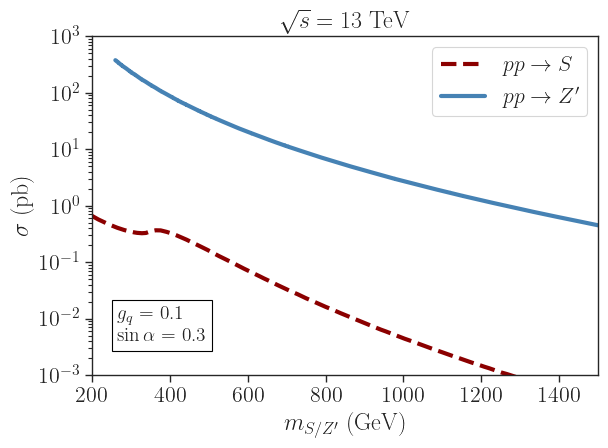

In [35]:
gq = 0.1
salpha = 0.3

# df_rest = dataDF[(dataDF['extpar.6'] < 0.27) & (dataDF['extpar.6'] > 0.24)]
x_s = np.array(dataDF['mass.9900026'])
y_s = np.array(dataDF['xsec13TeV(fb).9900026']*((salpha/dataDF['extpar.6'])**2)/1e3)
y_s = y_s[np.argsort(x_s)]
x_s = x_s[np.argsort(x_s)]
plt.plot(x_s,y_s,linewidth=3,label=r'$p p \to S$',c='darkred',linestyle='dashed')

x_zp = np.array(dataDF['mass.9900032'])
y_zp = np.array(dataDF['xsec13TeV(fb).9900032']*((gq/dataDF['extpar.2'])**2)/1e3)
y_zp = y_zp[np.argsort(x_zp)]
x_zp = x_zp[np.argsort(x_zp)]
plt.plot(x_zp,y_zp,linewidth=3,label=r'$p p \to Z^\prime$',c='steelblue')

plt.yscale('log')
plt.legend()
plt.xlim(200.,1500.0)
plt.ylim(1e-3,1e3)

textstr = '\n'.join((
    r'$g_q =$ %1.1f' %gq, 
    r'$\sin\alpha =$ %1.1f' %salpha))
plt.text(0.05,0.1,textstr,fontsize=14,bbox=dict(facecolor='none', edgecolor='black'),
         transform = plt.gca().transAxes)

plt.ylabel(r'$\sigma$ (pb)')
plt.xlabel(r'$m_{S/Z^\prime}$ (GeV)')
plt.title(r'$\sqrt{s} = 13$ TeV')
plt.tight_layout()
plt.savefig('2mdm_xsecs.png')
plt.show()